# Objetivo da Análise:

O objetivo principal é entender como diferentes cargos e níveis de experiência influenciam os salários dos funcionários. Vamos explorar padrões e insights para ajudar a identificar:

* Diferenças salariais por cargo e gênero
* Impacto da experiência no salário
* Tendências salariais para diferentes cargos

# Imports:

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt




In [ ]:
# importando dados

df = pd.read_csv('/content/tendencias_salariais_modificado.csv')
df

,ID,Gender,Experience (Years),Position,Salary
0,1.0,F,4.0,DevOps Engineer,109976
1,2.0,M,6.0,DevOps Engineer,120088
2,3.0,M,17.0,Web Developer,181301
3,4.0,M,7.0,Systems Administrator,77530
4,5.0,F,13.0,Systems Administrator,152397
...,...,...,...,...,...
395,396.0,F,19.0,Cloud Solutions Architect,236045
396,397.0,F,20.0,Web Developer,182770
397,398.0,F,9.0,Network Administrator,85550
398,399.0,M,18.0,Database Administrator (DBA),129996


# Tratamento dos Dados:


In [ ]:


# Verificar a presença de valores nulos
print("Valores nulos por coluna:")
print(df.isnull().sum())

# Remover as linhas com valores nulos
df_sem_nulos = df.dropna()

# Alternativamente, podemos preencher os valores nulos com a média da coluna, por exemplo:
# df_preenchido = df.fillna(df.mean())

# Exibir o DataFrame após remoção de nulos
print("DataFrame após remoção de nulos:")
print(df_sem_nulos)


Valores nulos por coluna:
ID                    5
Gender                5
Experience (Years)    5
Position              0
Salary                0
dtype: int64
DataFrame após remoção de nulos:
        ID Gender  Experience (Years)                      Position  Salary
0      1.0      F                 4.0               DevOps Engineer  109976
1      2.0      M                 6.0               DevOps Engineer  120088
2      3.0      M                17.0                 Web Developer  181301
3      4.0      M                 7.0         Systems Administrator   77530
4      5.0      F                13.0         Systems Administrator  152397
..     ...    ...                 ...                           ...     ...
395  396.0      F                19.0     Cloud Solutions Architect  236045
396  397.0      F                20.0                 Web Developer  182770
397  398.0      F                 9.0         Network Administrator   85550
398  399.0      M                18.0  Database 

In [ ]:

# Verificar e remover duplicatas
print("Número de duplicatas antes da remoção:")
print(df_sem_nulos.duplicated().sum())

df_sem_duplicatas = df_sem_nulos.drop_duplicates()

# Exibir o DataFrame após remoção de duplicatas
print("DataFrame após remoção de duplicatas:")
print(df_sem_duplicatas)


Número de duplicatas antes da remoção:
0
DataFrame após remoção de duplicatas:
        ID Gender  Experience (Years)                      Position  Salary
0      1.0      F                 4.0               DevOps Engineer  109976
1      2.0      M                 6.0               DevOps Engineer  120088
2      3.0      M                17.0                 Web Developer  181301
3      4.0      M                 7.0         Systems Administrator   77530
4      5.0      F                13.0         Systems Administrator  152397
..     ...    ...                 ...                           ...     ...
395  396.0      F                19.0     Cloud Solutions Architect  236045
396  397.0      F                20.0                 Web Developer  182770
397  398.0      F                 9.0         Network Administrator   85550
398  399.0      M                18.0  Database Administrator (DBA)  129996
399  400.0      F                11.0           IT Security Analyst  169058

[395 row

In [ ]:
# Calcular estatísticas descritivas
estatisticas = df_sem_duplicatas.describe()

print("Estatísticas descritivas:")
print(estatisticas)


Estatísticas descritivas:
               ID  Experience (Years)         Salary
count  395.000000          395.000000     395.000000
mean   200.936709            9.693671  132155.979747
std    115.844717            6.111056   43380.373410
min      1.000000            0.000000   43643.000000
25%    101.500000            4.000000  101192.500000
50%    200.000000           10.000000  129155.000000
75%    301.500000           15.000000  157900.000000
max    400.000000           20.000000  269950.000000


# Diferenças Salariais po Cargos:

In [ ]:
# Agrupar os dados por cargo e gênero e calcular a média salarial
media_salarial = df_sem_nulos.groupby(['Position', 'Gender'])['Salary'].mean().unstack()

# Exibir as médias salariais
print("Média salarial por cargo e gênero:")
print(media_salarial)


Média salarial por cargo e gênero:
Gender                                    F              M
Position                                                  
Cloud Solutions Architect     158085.764706  164445.461538
Database Administrator (DBA)  135692.687500  132600.238095
DevOps Engineer               165848.764706  158467.850000
IT Manager                    164478.050000  176945.050000
IT Security Analyst           148443.529412  124689.600000
IT Support Specialist          87131.117647   88354.928571
Network Administrator         122845.142857  113196.437500
Software Engineer             124160.333333  138554.500000
Systems Administrator         117342.000000  109315.350000
Systems Analyst               127034.181818  128573.400000
Web Developer                 112324.238095  106068.095238


In [ ]:
# Calcular a diferença salarial entre gêneros
media_salarial['Diferença'] = media_salarial['M'] - media_salarial['F']

# Exibir a diferença salarial
print("Diferença salarial por cargo:")
print(media_salarial['Diferença'])


Diferença salarial por cargo:
Position
Cloud Solutions Architect        6359.696833
Database Administrator (DBA)    -3092.449405
DevOps Engineer                 -7380.914706
IT Manager                      12467.000000
IT Security Analyst            -23753.929412
IT Support Specialist            1223.810924
Network Administrator           -9648.705357
Software Engineer               14394.166667
Systems Administrator           -8026.650000
Systems Analyst                  1539.218182
Web Developer                   -6256.142857
Name: Diferença, dtype: float64


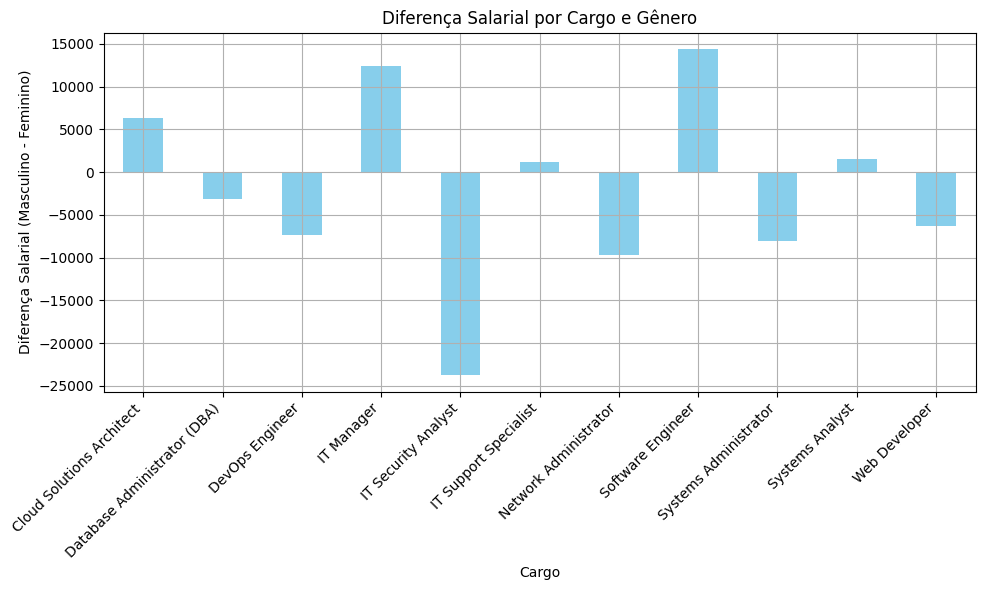

In [ ]:
import matplotlib.pyplot as plt

# Plotar o gráfico de barras das diferenças salariais
plt.figure(figsize=(10, 6))
media_salarial['Diferença'].plot(kind='bar', color='skyblue')

plt.title('Diferença Salarial por Cargo e Gênero')
plt.xlabel('Cargo')
plt.ylabel('Diferença Salarial (Masculino - Feminino)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [ ]:
df_sem_duplicatas

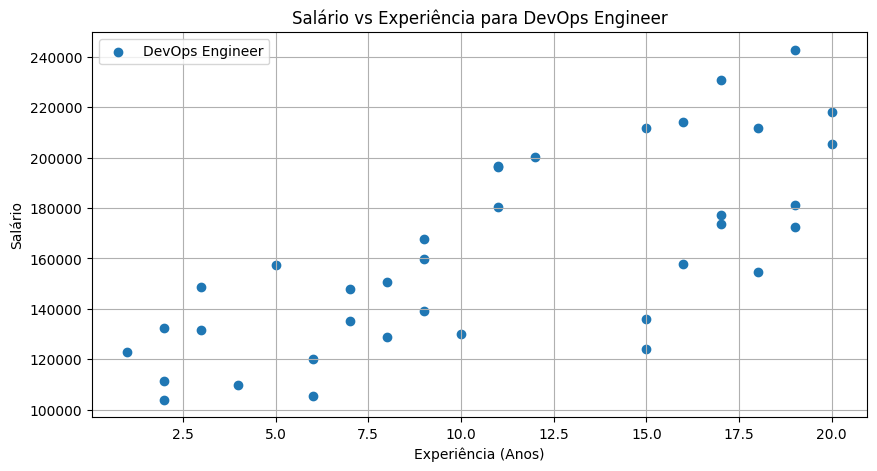

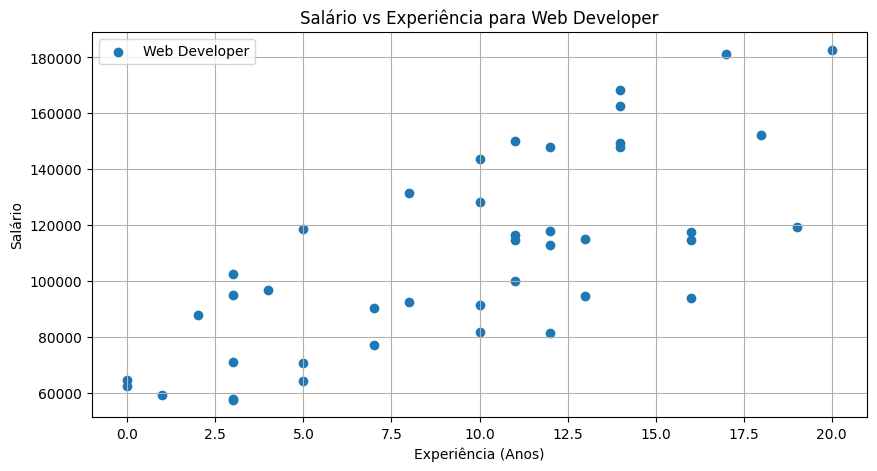

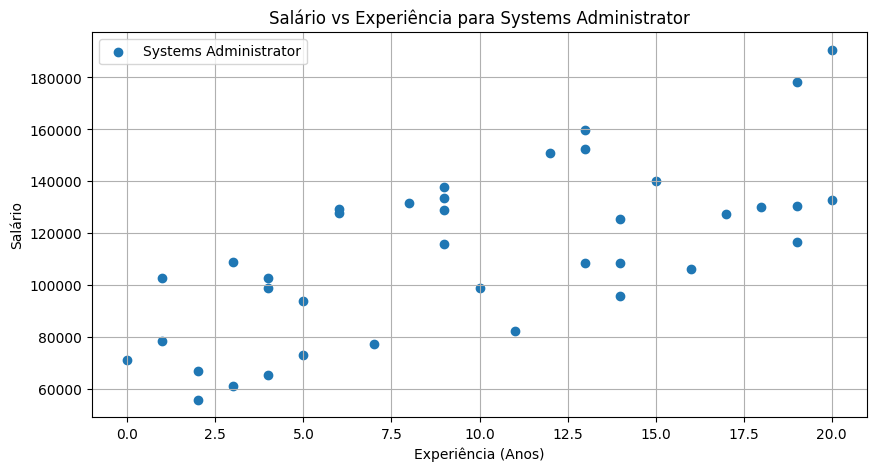

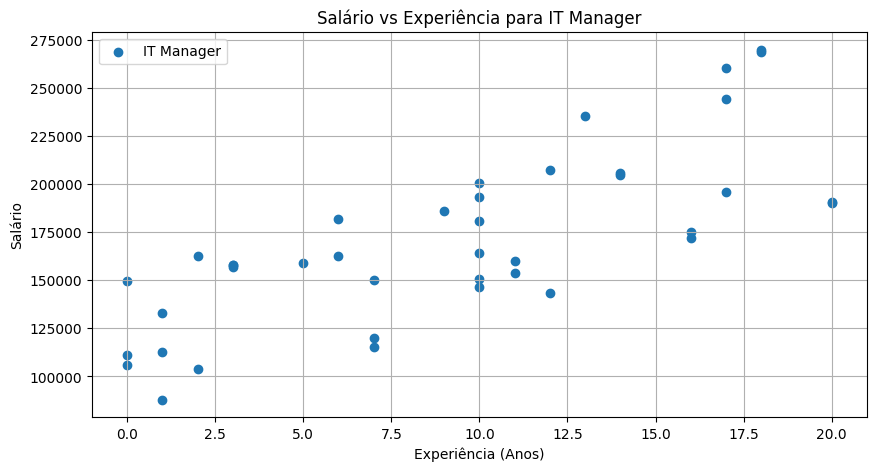

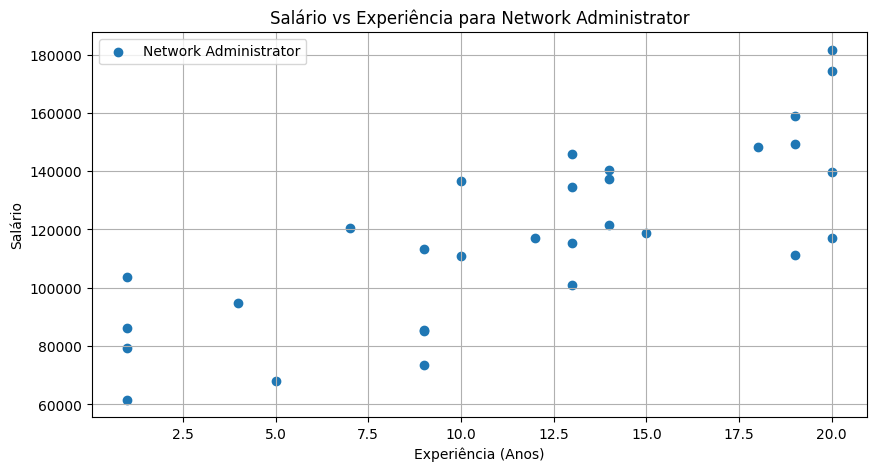

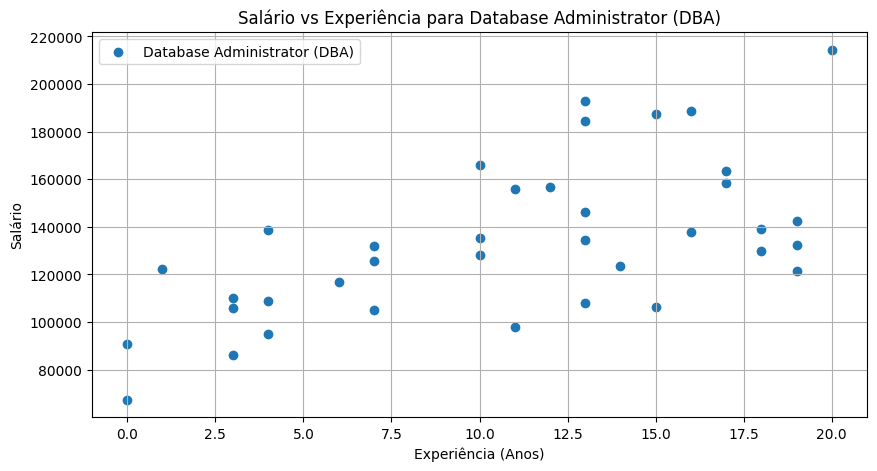

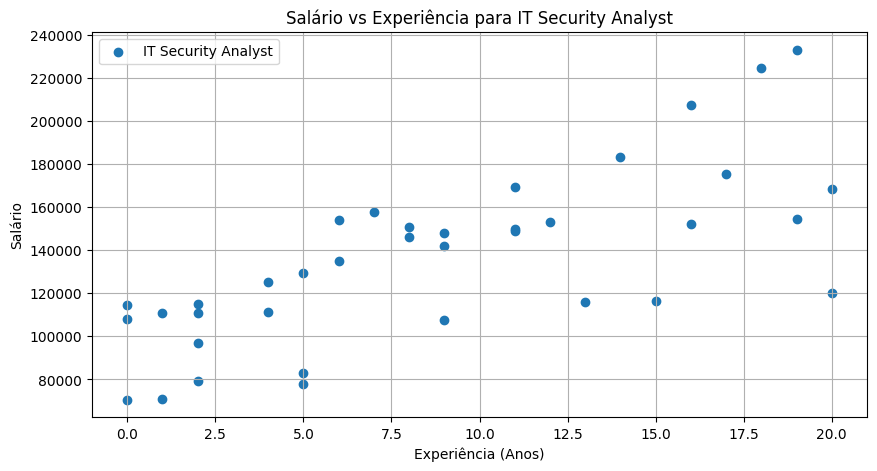

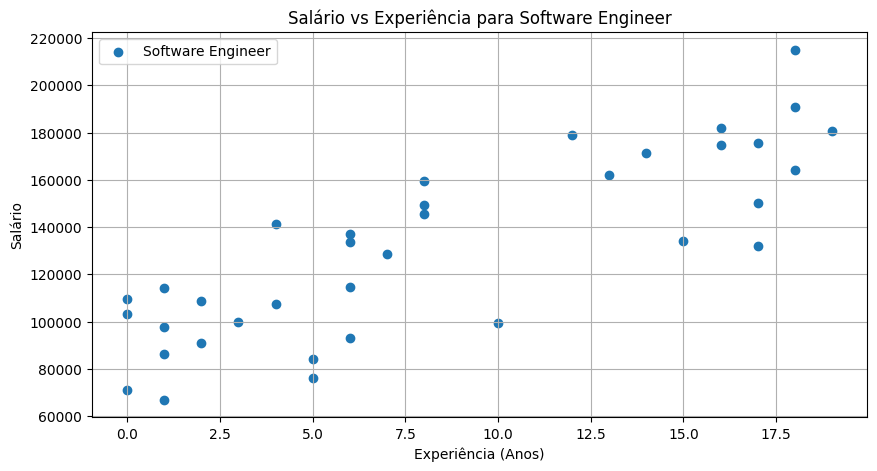

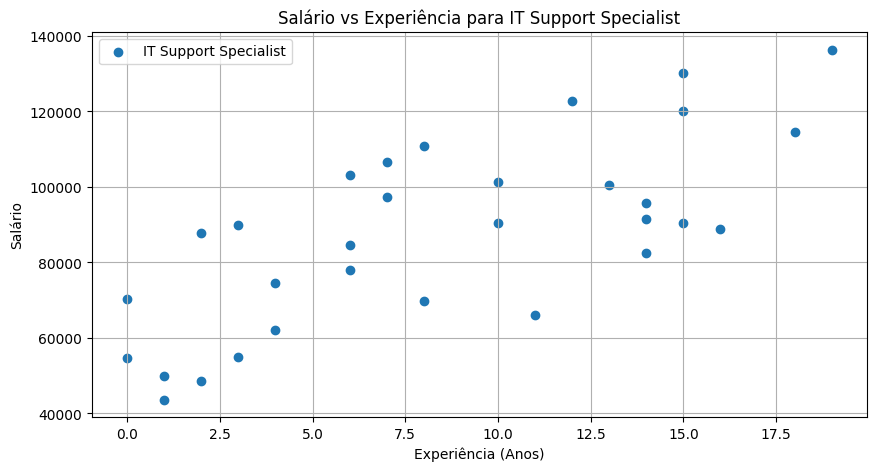

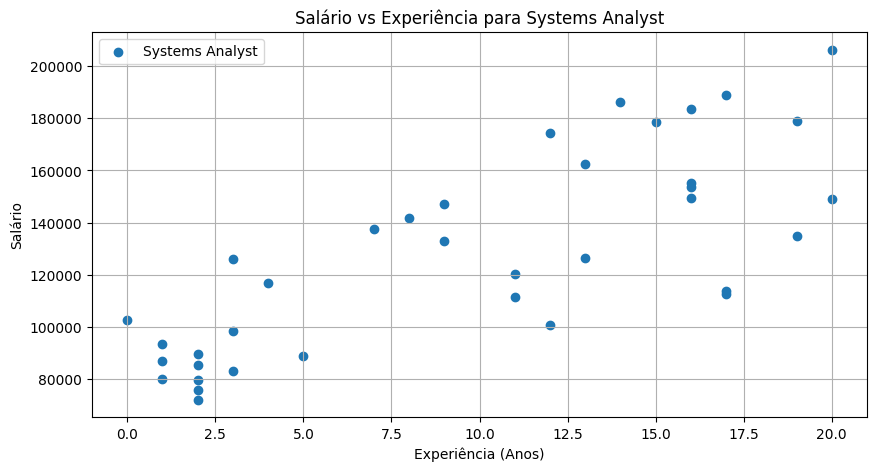

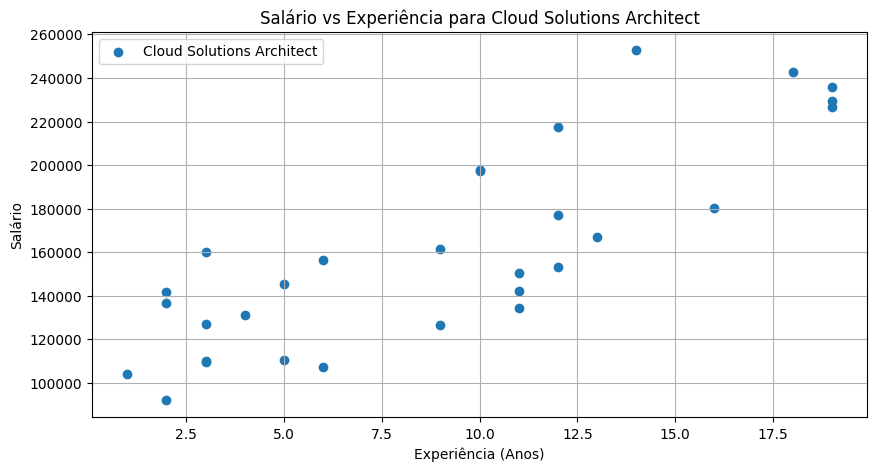

In [ ]:
# Análise por posição
positions = df_sem_duplicatas['Position'].unique()
for position in positions:
    pos_df = df[df['Position'] == position]
    plt.figure(figsize=(10, 5))
    plt.scatter(pos_df['Experience (Years)'], pos_df['Salary'], label=position)
    plt.title(f'Salário vs Experiência para {position}')
    plt.xlabel('Experiência (Anos)')
    plt.ylabel('Salário')
    plt.legend()
    plt.grid(True)
    plt.show()


<ipython-input-22-bf8b34422a4d>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pos_df = df_sem_nulos[df['Position'] == position]
<ipython-input-22-bf8b34422a4d>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pos_df = df_sem_nulos[df['Position'] == position]
<ipython-input-22-bf8b34422a4d>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pos_df = df_sem_nulos[df['Position'] == position]
<ipython-input-22-bf8b34422a4d>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pos_df = df_sem_nulos[df['Position'] == position]
<ipython-input-22-bf8b34422a4d>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pos_df = df_sem_nulos[df['Position'] == position]
<ipython-input-22-bf8b34422a4d>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pos_df = df_sem_nulos[df['Position'] == position]
<ipython-input-22-bf8b

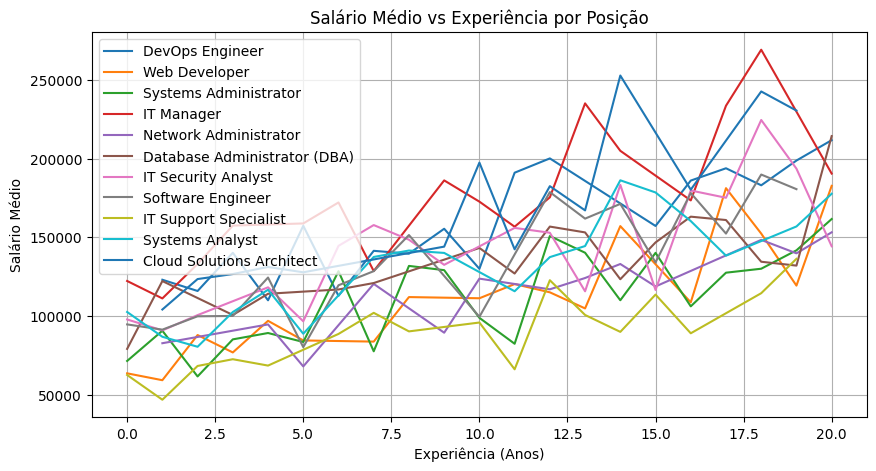

In [ ]:
# Análise por experiência
plt.figure(figsize=(10, 5))
for position in positions:
    pos_df = df_sem_nulos[df['Position'] == position]
    avg_salary = pos_df.groupby('Experience (Years)')['Salary'].mean()
    plt.plot(avg_salary.index, avg_salary.values, label=position)

plt.title('Salário Médio vs Experiência por Posição')
plt.xlabel('Experiência (Anos)')
plt.ylabel('Salário Médio')
plt.legend()
plt.grid(True)
plt.show()

# Conclusão:

Análise por Experiência:
* Ao analisar o salário médio em função da experiência para cada posição, observou-se:

Tendência Geral:
* Em geral, há uma tendência de aumento de salário com o aumento da experiência, independentemente da posição. Isso é consistente com o esperado, onde a experiência adicional contribui para habilidades mais desenvolvidas e, consequentemente, salários mais altos.

Diferenças por Posição:
* Algumas posições, como IT Managers e Software Engineers, mostram uma curva mais acentuada, indicando que a experiência adicional traz uma recompensa salarial mais significativa. Outras, como Systems Administrators, mostram um aumento mais gradual, refletindo uma estabilidade na faixa salarial.


# Portanto:


* A análise confirmou que há uma relação positiva entre experiência e salário, com variações baseadas na posição. Posições que exigem habilidades especializadas ou gerenciamento tendem a ter salários mais altos e um crescimento mais acentuado com a experiência. O resultado da análise oferece insights valiosos sobre como as posições e a experiência afetam as expectativas salariais, ajudando empresas e profissionais a entender melhor o mercado de trabalho e a planejar suas carreiras e estratégias de remuneração.

